# Librerias

In [69]:
## Conjunto de librerias a usar

### El objetivo aqui es ver lo que se esta importando, es por esta razon que puede verse largo
### la cantidad de lineas de importacion.


# Generales
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import seaborn as sns
import dill
from IPython.display import Image  
import pydotplus
import xgboost
from kneed import KneeLocator
import joblib
import mglearn
# Clonar modelos creados
from sklearn.base import clone 


## Funciones/Classes para Modelos
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn import tree
from sklearn.metrics import mean_squared_error


## Preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler


# Conjunto de Datos a cargar
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs

## Clasificadores 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


## librerias Regresion Lineal
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor ## Stochastic gradient descent (alternativa Mini-Batch)
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression


## IMPORTANTE: Libreria sklearn
import sklearn as skl ## importar la libreria de sklearn como skl


## SVM 
from sklearn.svm import LinearSVC # clasificacion
from sklearn.svm import LinearSVR # regresion
from sklearn.svm import SVC
from sklearn.svm import SVR

## Trees - Arboles de decisiones
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

# Ensemble methods
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

# Reduction of Dimension
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA

# Unsupervised learning
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.metrics.cluster import adjusted_rand_score


## advertencias
import warnings
## Ignorar las advertencias
warnings.filterwarnings('ignore')
## warnings.filterwarnings('always') ## mostrar advertencias


## fin

# Cargar datos

In [28]:
# Cargar datos de sklearn

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

X,y = mnist['data'],mnist['target']

# dividir en conjuntos de datos de train y test
X_train,X_test, y_train, y_test = train_test_split(X.values,y.values,random_state=0)

# Ver dimension de conjuntos creados
print(X.shape)
print(y.shape)

# fin

(70000, 784)
(70000,)


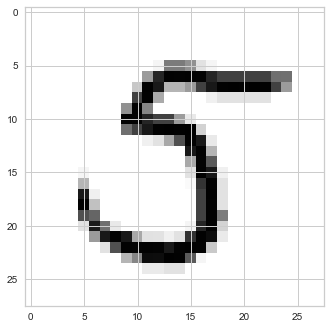

Valor de indice X[ii], valor ii: 1592
valor target y: 5


In [34]:
# Ver una cifra del dataset de forma aleatorio (exploracion)

ii = random.randint(0,X.shape[0])

digito_random = X.iloc[ii,:]
digito = digito_random.values.reshape((28, 28)) ## reshape

plt.imshow(digito, interpolation='nearest')
plt.show()

print('Valor de indice X[ii], valor ii: {}'.format(ii))
print('valor target y: {}'.format(y[ii]))

#print('Matriz de la imagen:\n\n{}'.format(X[ii]))

# fin

# Reducción de Dimension

## PCA

In [35]:
# PCA

pca = PCA() ## PCA(n_components=N)
pca.fit(X_train)

## Varianza Acumulada

cumsum = np.cumsum(pca.explained_variance_ratio_)
d85 = np.argmax(cumsum >= 0.85)+1 ## calcular la dimension requerida que capture al menos el 85% de la varianza de los datos
d90 = np.argmax(cumsum >= 0.90)+1 ## calcular la dimension requerida que capture al menos el 90% de la varianza de los datos
d95 = np.argmax(cumsum >= 0.95)+1 ## calcular la dimension requerida que capture al menos el 95% de la varianza de los datos
d97 = np.argmax(cumsum >= 0.97)+1 ## calcular la dimension requerida que capture al menos el 97% de la varianza de los datos
d98 = np.argmax(cumsum >= 0.98)+1 ## calcular la dimension requerida que capture al menos el 98% de la varianza de los datos
d99 = np.argmax(cumsum >= 0.99)+1 ## calcular la dimension requerida que capture al menos el 99% de la varianza de los datos

print('Dimension (85 varianza): ',d85)
print('Dimension (90 varianza): ',d90)
print('Dimension (95 varianza): ',d95)
print('Dimension (97 varianza): ',d97)
print('Dimension (98 varianza): ',d98)
print('Dimension (99 varianza): ',d99)

# fin

Dimension (85 varianza):  59
Dimension (90 varianza):  87
Dimension (95 varianza):  154
Dimension (97 varianza):  213
Dimension (98 varianza):  260
Dimension (99 varianza):  331


Dimension punto de codo (elbow):  91


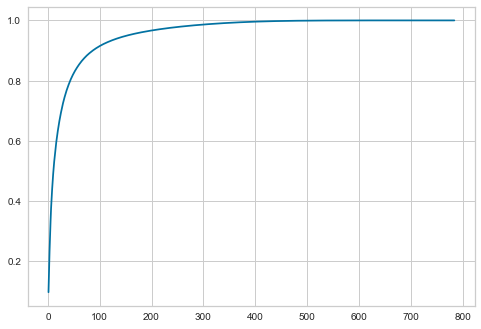

In [36]:
# Grafica de valores de varianza acumulada por PCA

varianzas = np.cumsum(pca.explained_variance_ratio_) ## valores acumulados
dimensiones = np.arange(len(varianzas))+1

plt.plot(dimensiones,varianzas)

## en KneeLocator .... curve={'concave','convex'}, direction={'increasing','decreasing'} 
kn = KneeLocator(dimensiones,varianzas, curve='concave', direction='increasing')
print('Dimension punto de codo (elbow): ',kn.knee)

# fin

In [37]:
# PCA con valor optimo de dimension "d" calculado antes

pca = PCA(n_components=kn.knee) ## PCA(n_components=N)
pca.fit(X_train)
X_red = pca.transform(X_train) ## transformar datos

print('Varianza explicada: ',np.sum(pca.explained_variance_ratio_))

print('Dimension original: ',X_train.shape)
print('Dimension reducida: ',X_red.shape)

X_rec = pca.inverse_transform(X_red)
print('Dimension inversa: ',X_rec.shape)

### Test - PCA
X_test_t = pca.transform(X_test) ## transformar ... reducir dimension mediante PCA
X_test_t = pca.inverse_transform(X_test_t) ## transf. inversa ... volver a la dimension original 

## Nota: Es importante notar que al hacer: pca.inverse_trasnform(pca.transform(X)) se obtiene una perdida de informacion

# fin

Varianza explicada:  0.9051882700957652
Dimension original:  (52500, 784)
Dimension reducida:  (52500, 91)
Dimension inversa:  (52500, 784)


## Ejemplo de uso de PCA en la compresion-decompresion de informacion

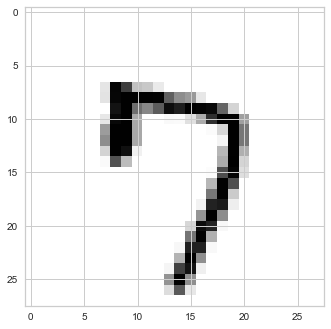

Valor de indice X_train[ii], valor ii: 14261
valor target y: 3


In [39]:
## Seleccionar y mostrar una imagen X original (sin PCA)

ii = random.randint(0,X_test.shape[0])

digito_random = X_test[ii]
digito = digito_random.reshape(28, 28) ## reshape

plt.imshow(digito, interpolation='nearest')
plt.show()

print('Valor de indice X_train[ii], valor ii: {}'.format(ii))
print('valor target y: {}'.format(y[ii]))

#print('Matriz de la imagen:\n\n{}'.format(X[ii]))

# fin

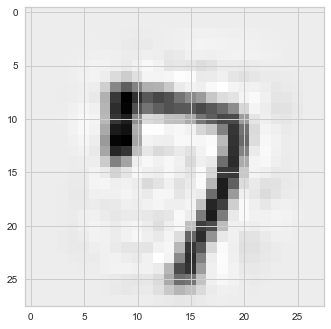

In [41]:
# Mostrar imagen reconstruida del PCA - (Se evidencia perdida de informacion por compresion-descompresion de datos)

digito_random = X_test_t[ii]
digito = digito_random.reshape(28, 28) ## reshape

plt.imshow(digito, interpolation='nearest')
plt.show()

# fin

## Uso de Mini-Batch PCA

In [42]:
# PCA incremental == Mini-batch

inc_pca = IncrementalPCA(n_components=91,batch_size=100) ## se particionan los datos
inc_pca.fit(X_train)
X_pca = inc_pca.transform(X_train)

print('dimension original: ',X_train.shape)
print('dimension reducida: ',X_pca.shape)
# fin

dimension original:  (52500, 784)
dimension reducida:  (52500, 91)


## Kernel PCA

In [43]:
# Seleccionar 10 000 datos de la matriz

X_train2 = X_train[:10000].copy()
y_train2 = y_train[:10000].copy()

In [44]:
# Ejemplo de KPCA + Clasificador en Pipeline para probar varias alternativas con GridSearch

# Crear un pipeline con una tabla de potenciales valores
cla = Pipeline([
    ('kpca',KernelPCA(n_components=2)),
    ('log_reg',LogisticRegression())
])

param_grid = [{
    'kpca__gamma':np.linspace(0.03,0.05,2),
    'kpca__kernel':['rbf','sigmoid']
}]

# Busqueda en Grilla
grid = GridSearchCV(cla,param_grid,cv=3,verbose=10)
grid.fit(X_train2,y_train2)
ii

# Ver mejores parametros
print('Mejores parametros:')
print(grid.best_params_) ## mejores parametros
print('\nAccuracy Test score: ',accuracy_score(y_test,grid.predict(X_test)))

# fin

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START kpca__gamma=0.03, kpca__kernel=rbf..........................
[CV 1/3; 1/4] END kpca__gamma=0.03, kpca__kernel=rbf;, score=0.115 total time=   4.6s
[CV 2/3; 1/4] START kpca__gamma=0.03, kpca__kernel=rbf..........................
[CV 2/3; 1/4] END kpca__gamma=0.03, kpca__kernel=rbf;, score=0.114 total time=   4.5s
[CV 3/3; 1/4] START kpca__gamma=0.03, kpca__kernel=rbf..........................
[CV 3/3; 1/4] END kpca__gamma=0.03, kpca__kernel=rbf;, score=0.115 total time=   4.5s
[CV 1/3; 2/4] START kpca__gamma=0.03, kpca__kernel=sigmoid......................
[CV 1/3; 2/4] END kpca__gamma=0.03, kpca__kernel=sigmoid;, score=0.115 total time=   2.2s
[CV 2/3; 2/4] START kpca__gamma=0.03, kpca__kernel=sigmoid......................
[CV 2/3; 2/4] END kpca__gamma=0.03, kpca__kernel=sigmoid;, score=0.114 total time=   2.1s
[CV 3/3; 2/4] START kpca__gamma=0.03, kpca__kernel=sigmoid......................
[CV 3/3; 2/4] EN

In [45]:
# KernelPCA (Reduccion - Recontruccion)

rbf_pca = KernelPCA(n_components=2,kernel='rbf',gamma=0.0433,fit_inverse_transform=True,n_jobs=-1)
X_reduced = rbf_pca.fit_transform(X_train2)
X_inversa = rbf_pca.inverse_transform(X_reduced)

# reconstruccion de imagen
print('Error cuadratico medio (MSE): ',mean_squared_error(X_train2,X_inversa))

# fin

Error cuadratico medio (MSE):  4373.131562843149


# Unsupervised Learning

## Kmeans

In [46]:
# Cargar datos

iris = datasets.load_iris()
X3 = iris['data']
y3 = iris['target'] 

# dividir en conjuntos de datos de train y test
X3_train,X3_test, y3_train, y3_test = train_test_split(X3,y3,random_state=0)

# fin

In [47]:
# KMEANS

k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X3_train)

print(y_pred[:20])
print('Centros de cada cluster:')
print(kmeans.cluster_centers_)

# fin

[3 2 0 1 0 1 1 2 0 0 3 0 2 4 3 2 3 3 2 3]
Centros de cada cluster:
[[6.59       3.07       5.5        2.15      ]
 [4.9972973  3.38918919 1.45405405 0.24054054]
 [5.5        2.6        3.87368421 1.19473684]
 [6.228      2.84       4.74       1.584     ]
 [7.49090909 3.14545455 6.3        2.07272727]]


In [48]:
# medir distancias hacia los centroids

print(kmeans.transform(X3_test[:20])) # distancias hacia los centroides ajustados

## CLUSTERS: 0 1 2 3 4 

# fin

[[0.95890563 4.35289128 1.75684652 0.9900707  2.12735043]
 [2.16275288 3.07866904 0.68108598 1.16199828 3.09151064]
 [4.80390466 0.95639404 3.10943965 3.93073021 5.70901853]
 [1.13820033 5.60864081 3.09569892 1.90605351 0.41361139]
 [4.73703494 0.06227956 2.7411454  3.77288219 5.72857128]
 [0.71379269 5.24173355 2.71199756 1.62586592 1.30946964]
 [4.87601272 0.19888293 2.9128001  3.92757432 5.87136207]
 [1.03706316 3.88654475 1.57034499 0.5468455  1.87499862]
 [1.08143423 4.0170364  1.62178726 0.60517766 1.81638548]
 [1.81259483 3.02777018 0.65347992 0.80389054 2.8179912 ]
 [1.01661202 4.51353374 1.83910282 0.92056504 1.7817718 ]
 [1.21470161 3.58711475 1.28664566 0.47311732 2.18198863]
 [1.36216739 3.60829942 1.04058901 0.40870527 2.3185383 ]
 [1.14608028 3.75346151 1.28868934 0.3197499  2.07828203]
 [1.213054   3.65181744 1.08394223 0.235457   2.23773055]
 [4.91421408 0.27673353 2.94577024 3.96220141 5.90093843]
 [1.34145443 3.479762   0.90854668 0.3467564  2.41889942]
 [1.87656601 3

In [49]:
# detalles de KMeans

centros_iniciales = kmeans.cluster_centers_ ## se usan los centros
kmeans2 = KMeans(n_clusters = 5, init=centros_iniciales, n_init=1) ## se inicia en centros asignados
kmeans2.fit(X3_train)

print(kmeans2.cluster_centers_)
print('Inercia: ',kmeans2.inertia_)
print('Coeficiente de Silueta: ',silhouette_score(X3_train,kmeans2.labels_))
# fin

[[6.59       3.07       5.5        2.15      ]
 [4.9972973  3.38918919 1.45405405 0.24054054]
 [5.5        2.6        3.87368421 1.19473684]
 [6.228      2.84       4.74       1.584     ]
 [7.49090909 3.14545455 6.3        2.07272727]]
Inercia:  34.06498409414198
Coeficiente de Silueta:  0.49431267401191176


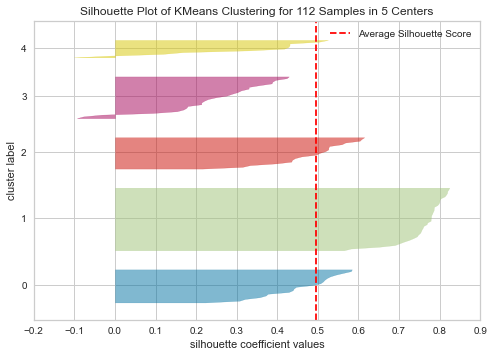

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 112 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(init=array([[6.59      , 3.07      , 5.5       , 2.15      ],
       [4.9972973 , 3.38918919, 1.45405405, 0.24054054],
       [5.5       , 2.6       , 3.87368421, 1.19473684],
       [6.228     , 2.84      , 4.74      , 1.584     ],
       [7.49090909, 3.14545455, 6.3       , 2.07272727]]),
                                      n_clusters=5, n_init=1))

In [50]:
# visualizar coef. de silueta

silhouette_visualizer(kmeans2, X3_train, colors='yellowbrick')

# fin

In [51]:
# Aplicar un clasificador

pipe = Pipeline([
    ('kmeans',KMeans(n_clusters=50,n_jobs=-1)),
    ('log_reg',LogisticRegression(n_jobs=-1))
],verbose=10)

# ajustar datos al modelo 
pipe.fit(X3_train,y3_train)

print('Rendimiento de clasificador (kmeans + logreg): ')
print(pipe.score(X3_test,y3_test)) ## se pasa (X,y) dado que aplica fit + transform

# fin

[Pipeline] ............ (step 1 of 2) Processing kmeans, total=   0.1s
[Pipeline] ........... (step 2 of 2) Processing log_reg, total=   1.7s
Rendimiento de clasificador (kmeans + logreg): 
0.9473684210526315


In [52]:
# Grid Search - Entrenar y ver mejores parametros

# Definir gridsearch segun espacio de busqueda
param_grid = dict(kmeans__n_clusters=range(2,100))
grid_cla = GridSearchCV(pipe,param_grid,cv=5,verbose=10)
grid_cla.fit(X3_train,y3_train)

print('Mejores parametros: ')
print(grid_cla.best_params_)

print('\nScore: ')
print(grid_cla.score(X3_test,y3_test))

# fin

Fitting 5 folds for each of 98 candidates, totalling 490 fits
[CV 1/5; 1/98] START kmeans__n_clusters=2.......................................
[Pipeline] ............ (step 1 of 2) Processing kmeans, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing log_reg, total=   1.0s
[CV 1/5; 1/98] END ........kmeans__n_clusters=2;, score=0.957 total time=   0.9s
[CV 2/5; 1/98] START kmeans__n_clusters=2.......................................
[Pipeline] ............ (step 1 of 2) Processing kmeans, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing log_reg, total=   1.0s
[CV 2/5; 1/98] END ........kmeans__n_clusters=2;, score=0.913 total time=   1.0s
[CV 3/5; 1/98] START kmeans__n_clusters=2.......................................
[Pipeline] ............ (step 1 of 2) Processing kmeans, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing log_reg, total=   1.0s
[CV 3/5; 1/98] END ........kmeans__n_clusters=2;, score=1.000 total time=   0.9s
[CV 4/5; 1/98] START kmean

In [53]:
# Resultado de Grid Search

print('Mejores parametros: ')
print(grid_cla.best_params_)

print('\nScore: ')
print(grid_cla.score(X3_test,y3_test))

# fin

Mejores parametros: 
{'kmeans__n_clusters': 8}

Score: 
0.9473684210526315


# Semi-Supervisado

In [54]:
## Cargar datos de numeros

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

X,y = mnist['data'],mnist['target']

# dividir en conjuntos de datos de train y test
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=0)

print(X.shape)
print(y.shape)

# fin

(70000, 784)
(70000,)


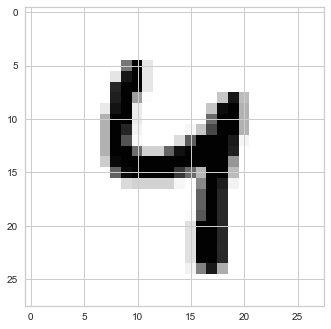

Valor de indice X[ii], valor ii: 53898
valor target y: 4


In [60]:
# Ver una imagen de forma aleatoria del dataset cargado

ii = random.randint(0,X.shape[0])

digito_random = X.iloc[ii,:]
digito = digito_random.values.reshape(28, 28) ## reshape

plt.imshow(digito, interpolation='nearest')
plt.show()

print('Valor de indice X[ii], valor ii: {}'.format(ii))
print('valor target y: {}'.format(y[ii]))

#print('Matriz de la imagen:\n\n{}'.format(X[ii]))

# fin

In [ ]:
# Obtener los 50 datos mas representativos

k=50
kmeans = KMeans(n_clusters=k,n_jobs=-1)
X_dist = kmeans.fit_transform(X_train)
i_rep = np.argmin(X_dist,axis=0)
X_best = X_train.iloc[i_rep,:]

# fin

In [ ]:
# Probar

largo = X_best.shape[0]
y_best = np.zeros(largo)

for ii in range(0,largo):
    digito_random = X.iloc[ii,:]
    digito = digito_random.values.reshape(28, 28) ## reshape
    plt.imshow(digito, interpolation='nearest')
    plt.show()
    y_best[ii]=input('Ingrese numero de imagen: ')
    print('Registrado!!\n')

print('Fin ingreso de datos... Entrenamiento de modelo\n')

# fin

In [66]:
# entrenamiento de regresion logistica

log_r = LogisticRegression()
log_r.fit(X_best,y_best)

print('Valores reales: ')
print(y_best[:10])
print('\nValores del modelo: ')
print(log_r.predict(X_best)[:10])

# fin

Valores reales: 
[5. 0. 4. 1. 9. 2. 1. 5. 1. 4.]

Valores del modelo: 
[5. 0. 4. 1. 9. 2. 1. 5. 1. 4.]


## DBSCAN

In [67]:
# cargar datos

X,y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

print('Etiquetas:')
print(dbscan.labels_)
print('\n\nComponentes:')
print(dbscan.components_)

# fin

Etiquetas:
[ 0  0  0  1  0  1  2  3  0  3  4  0  0  5  0  3 -1  3 10  4  0  4  0  0
  3  1  4  0  0 -1  5  0  3  5  0  0  3  0  4  0  5  5  0  0  6 -1  2  4
  7  0  2  5  0  0  0  4  4  2  4  0  3  0  0  4  3  8 -1  0  4  0  4  3
  5  0  0  9  2  0  0  8  4 -1  0 -1  0 -1  3  3  4  0  0  4  3  0  0  3
  5  3  2  3  2  0  3  0  0  2  2  2  7  0  2  0  7  5  0  0  0  3  3  0
  0  8  3  1  3  0  0  9  5  6  0  0 -1  3  2  4  0  3  0  3  5  8  8  3
  0 -1  0  4  0  5  0 -1  5  3  1  5  3  0  0  3  0  4  5  0  5  1  2 -1
  5  0  0  9  2  8  0  4  4  0  4  3  7  3  5  4  0  3  7 -1  2  8  6  4
 10  3  0  5  3 -1  8  6  6  0  4  3  2  0  3  5  4  8  0  3  2  0  5  0
  4  0  0  3  0  0  3  3  0  1  3  2  0  0  4  8  3  7  5  3  3  0  5  0
  4  9  3  9  0  6  3  3  4  0  7  0 -1  0  3  4  0  0  4  0  8  5  3  4
  0  0  0  9  0  0 -1  9  2  2  0  0  0  2  5  9  5  3  3  4  2  0  0  0
  0  7  1  0  4  4  6  5  5 -1  6  0  3  4  3  0 -1  2  4  4  4  4  0  4
 -1  0  3  8  5  4  0  0  0  0  0  0  3 

## Agrupacion por aglomeramiento

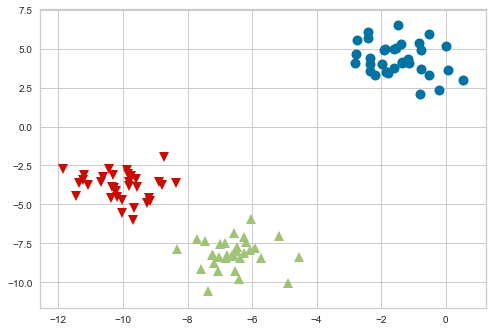

In [73]:
# cargar datos

X, y = make_blobs(random_state=1)

agglo = AgglomerativeClustering(n_clusters=3) # default is 'ward'
y_pred = agglo.fit_predict(X)

mglearn.discrete_scatter(X[:,0],X[:,1],y_pred)

# fin

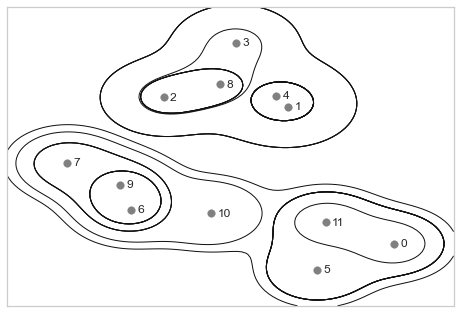

In [74]:
mglearn.plots.plot_agglomerative()

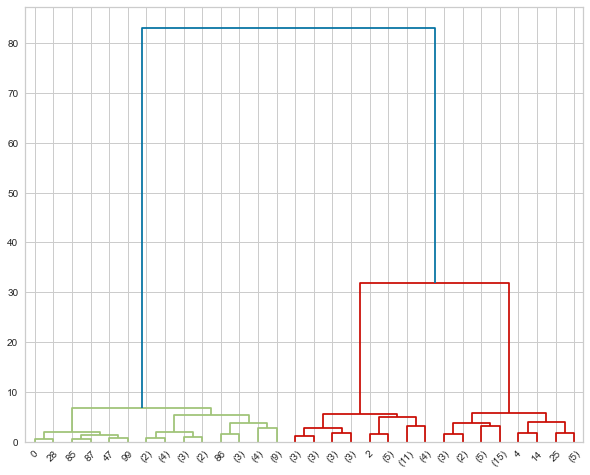

In [75]:
# Dendograma de misma clasificacion

dendo = ward(X)
plt.figure(figsize=(10,8))
a = dendrogram(dendo,truncate_mode='level',p=4)

# fin

In [76]:
# DBSCAN - Clasificacion segun modelo

dbscan2 = DBSCAN()
clusters = dbscan2.fit_predict(X)
print('Etiquetas: ',clusters)

# fin

Etiquetas:  [-1 -1 -1  0 -1  1  1 -1 -1  2 -1  0  1 -1 -1  1  1  2  3 -1  1  3  1  2
  3 -1  1  2 -1 -1  4  5 -1  2 -1  1 -1 -1  3  1  1 -1  2 -1  0  1 -1 -1
 -1  2  3 -1 -1 -1  4  1 -1 -1  4  2  0 -1 -1 -1 -1 -1 -1 -1  2  0  0 -1
  1 -1 -1 -1  1  1  2 -1 -1 -1  0 -1  5 -1 -1 -1  0  5  1  2  4 -1 -1 -1
 -1  4 -1 -1]
